# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [171]:
# Checking the number of mice.
number_of_mice = mouse_study["Mouse ID"].nunique()
number_of_mice

249

In [172]:
mouse_study.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [173]:
number_of_mice_unique = mouse_study.groupby("Mouse ID")["Timepoint"].nunique()
number_of_mice_unique


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Timepoint, Length: 249, dtype: int64

In [174]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_list = duplicate_mice[["Mouse ID", "Timepoint"]].drop_duplicates().values.tolist()
unique_duplicate_mice = np.array(list(set([item[0] for item in duplicate_mice_list])), dtype=object)
unique_duplicate_mice

array(['g989'], dtype=object)

In [175]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_df = mouse_study[mouse_study["Mouse ID"].isin(unique_duplicate_mice)]
duplicate_mice_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [176]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicate_mouse = mouse_study[~mouse_study["Mouse ID"].isin(unique_duplicate_mice)]
clean_duplicate_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [177]:
# Checking the number of mice in the clean DataFrame.
number_clean_mice = clean_duplicate_mouse["Mouse ID"].nunique()
number_clean_mice

248

In [178]:
unique_mouse_ids = clean_duplicate_mouse["Mouse ID"].unique()
print(unique_mouse_ids)
print(len(unique_mouse_ids))

['b128' 'f932' 'g107' 'a457' 'c819' 'h246' 'p189' 'n923' 'q119' 'f993'
 'z234' 'b559' 'y260' 'x930' 'o725' 'z969' 'v835' 'r604' 'n304' 'l700'
 'x336' 'l725' 'm133' 'v295' 'a818' 'y601' 't724' 'k382' 'w422' 'c326'
 'c139' 'v339' 'a577' 'y163' 'k483' 'k804' 'o809' 'z581' 'a251' 'i386'
 'c580' 'q132' 'u327' 'v603' 'f278' 'g497' 'd474' 'o973' 'c832' 'o331'
 'm650' 'v289' 'm550' 'h428' 'r701' 'v199' 'x264' 'f234' 'c458' 'q610'
 'j913' 'a411' 'a444' 'd251' 'j989' 'y449' 'k403' 'c758' 'x402' 'r811'
 'a644' 'i177' 'g791' 'a520' 'u196' 'm546' 'w678' 'n364' 's508' 'e662'
 'z578' 'r921' 'a492' 'w540' 'v764' 'z795' 'e291' 'e584' 'e213' 'j755'
 's565' 'a366' 'p387' 'b879' 'i901' 'k862' 'g867' 's619' 'w697' 'j984'
 'c402' 'h333' 'k510' 'p981' 't451' 'a963' 'm269' 'z314' 'o848' 'v719'
 'q597' 'c895' 'a203' 'f394' 'c264' 'n967' 'f545' 'k894' 'k754' 'g296'
 'd164' 'w575' 'x613' 'q633' 'b313' 'f129' 'j365' 'p136' 'c559' 'a788'
 's337' 'q511' 'm331' 'o926' 'd133' 'n630' 'a401' 'w350' 'c302' 'a897'
 'j235

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
group_regimen = clean_duplicate_mouse.groupby(["Drug Regimen"])
mean_tumor_volume = group_regimen["Tumor Volume (mm3)"].mean()
median_tumor_volume = group_regimen["Tumor Volume (mm3)"].median()
variance_tumor_volume = group_regimen["Tumor Volume (mm3)"].var()
standard_deviation_tumor_volume = group_regimen["Tumor Volume (mm3)"].std()
sem_tumor_volume = group_regimen["Tumor Volume (mm3)"].sem()
summary_statistics = pd.DataFrame({"Mean": mean_tumor_volume, "Median": median_tumor_volume, "Variance": variance_tumor_volume, "Standard Deviation": standard_deviation_tumor_volume, "SEM": sem_tumor_volume})
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [180]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = group_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print("Tumor Volume (mm3)")
print(summary_statistics)

Tumor Volume (mm3)
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_of_regimen = group_regimen["Mouse ID"].count()
rows_of_regimen


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

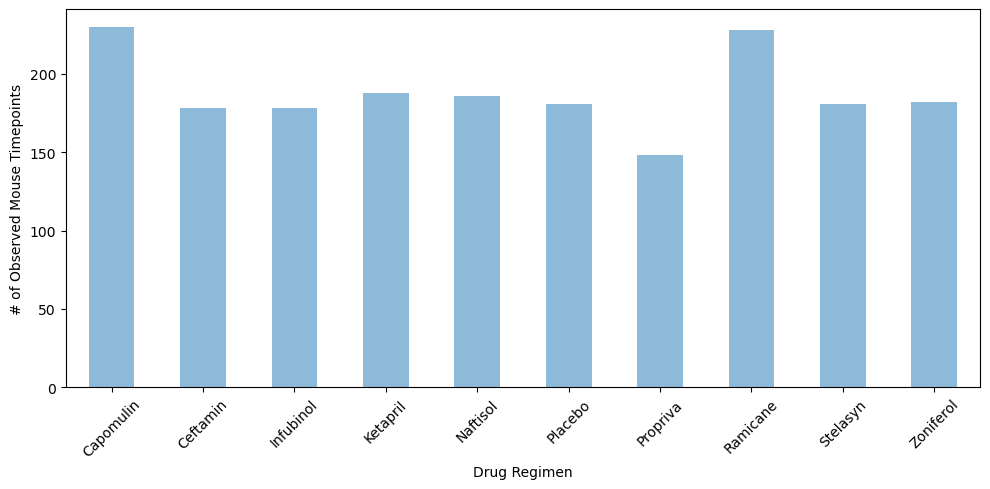

In [194]:
multi_plot = rows_of_regimen.plot(kind="bar", figsize=(10,5), alpha = 0.5, align="center")

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rows_of_regimen.index, rotation=45)
multi_plot.set_xlabel("Drug Regimen")
multi_plot.set_ylabel("# of Observed Mouse Timepoints")
#plt.show()
plt.tight_layout()

In [ ]:
multi_plot2 = plt.bar(row, figsize=(10,5), alpha = 0.5, align="center")

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rows_of_regimen.index, rotation=45)
multi_plot.set_xlabel("Drug Regimen")
multi_plot.set_ylabel("# of Observed Mouse Timepoints")
#plt.show()
plt.tight_layout()

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [57]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [58]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [60]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [61]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
